In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

### Joint plot

In [10]:
#save_dir_win = "E:/cmu/lab project/result & analysis/V5-pilot/plot"
save_dir_mac =  "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/7.replicate-len4-Complextone-Everydaysounds/result/prolific-8-29-result"

df_PA = pd.read_csv(os.path.join(save_dir_mac,'P_A_dprime_result.csv'))
df_SD = pd.read_csv(os.path.join(save_dir_mac,'S_D_dprime_result.csv'))

df_PA['Experiment'] = 'P_A'
df_SD['Experiment'] = 'S_D'

df = pd.concat([df_PA, df_SD])

print('total subjects', int(len(df)/2))
print(df.columns[0])
print(df.columns)

total subjects 40
Randomized complex_tone
Index(['Randomized complex_tone', 'Randomized everyday_sound', 'Experiment'], dtype='object')


In [11]:
df_PA = df[df['Experiment'] == 'P_A']
df_SD = df[df['Experiment'] == 'S_D']

# fixed_list = [[row_PA['Fixed Pitch'], row_PA['Fixed Syllable'], row_SD['Fixed Pitch'], row_SD['Fixed Syllable']] 
#               for (_, row_PA), (_, row_SD) in zip(df_PA.iterrows(), df_SD.iterrows())]
# print(len(fixed_list))
# print(len(fixed_list[0]))

randomized_list = [[row_PA[df.columns[0]], row_PA[df.columns[1]], row_SD[df.columns[0]], row_SD[df.columns[1]]] 
                   for (_, row_PA), (_, row_SD) in zip(df_PA.iterrows(), df_SD.iterrows())]

print('total subjects', len(randomized_list))
print('total number of category for plotting', len(randomized_list[0]))

total subjects 40
total number of category for plotting 4


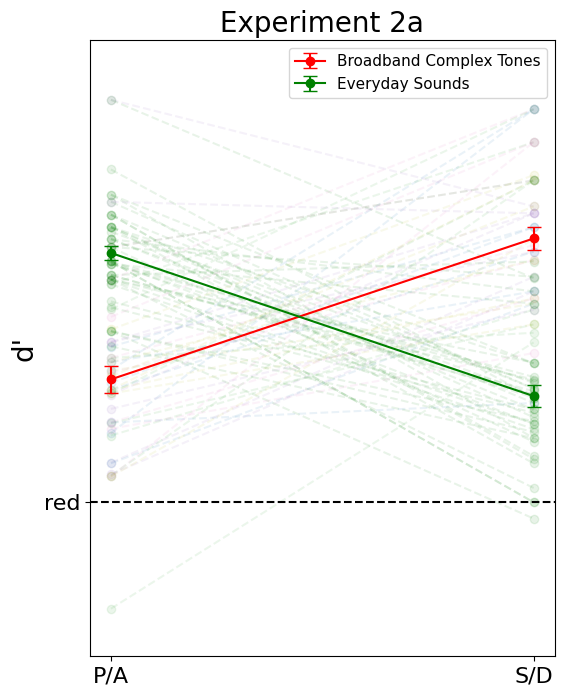

In [12]:
# Convert randomized_list to numpy array for easier calculations
dprime_array_random = np.array(randomized_list)

# Calculate average and standard error
dprime_avg_random = np.mean(dprime_array_random, axis=0)
dprime_sem_random = np.std(dprime_array_random, axis=0) / np.sqrt(len(randomized_list))

# Plotting
x = ['P/A', 'S/D']
plt.figure(figsize=(6,8))

# Plot data for all subjects
for i, dprime in enumerate(randomized_list):
    pitch = [dprime[0], dprime[2]]
    syllable = [dprime[1], dprime[3]]
    plt.plot(x, pitch, '--o', 'red', alpha=0.09)
    plt.plot(x , syllable, 'g--o', alpha=0.09)

# Plot average d' with error bars
plt.errorbar(x, dprime_avg_random[0::2], yerr=dprime_sem_random[0::2], fmt='o-', color = 'red', label='Broadband Complex Tones', capsize=5)
plt.errorbar(x, dprime_avg_random[1::2], yerr=dprime_sem_random[1::2], fmt='go-', label='Everyday Sounds', capsize=5)

# Reference line
plt.axhline(y=0, color='black', linestyle='--')

plt.title(' Experiment 2a ', fontsize = 20)
#plt.xlabel('Task type', fontsize=16)
plt.ylabel('d\'', fontsize=20)
plt.xticks([0,1], x, fontsize = 16)
plt.yticks(fontsize=16)
#plt.grid(True)

plt.ylim([-1.5, 4.5])
plt.legend(loc = 'upper right', fontsize = 11)
#plt.show()


# specify the full path (including filename) where you want to save the plot
save_path = os.path.join(save_dir_mac, "Complete_result.png")
# save the plot
plt.savefig(save_path, dpi=300)
plt.show()

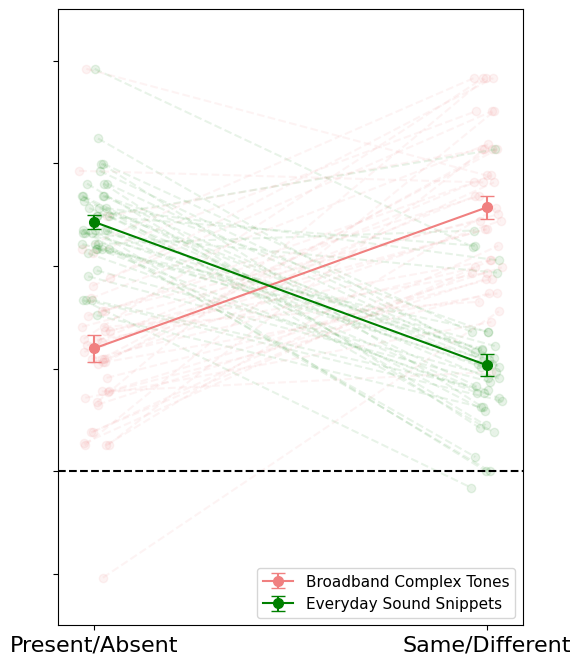

In [13]:
# Convert randomized_list to numpy array for easier calculations
dprime_array_random = np.array(randomized_list)

# Calculate average and standard error
dprime_avg_random = np.mean(dprime_array_random, axis=0)
dprime_sem_random = np.std(dprime_array_random, axis=0) / np.sqrt(len(randomized_list))

#Your existing setup
x = ['Present/Absent', 'Same/Different']
plt.figure(figsize=(6,8))

# Assuming randomized_list, dprime_avg_random, and dprime_sem_random are defined
# Adding jitter
jitter = 0.04  # Adjust this for more/less jitter

for i, dprime in enumerate(randomized_list):
    pitch = [dprime[0], dprime[2]]
    syllable = [dprime[1], dprime[3]]
    
    # Create jittered x-coordinates
    x_jittered_pitch = [np.random.uniform(-jitter, jitter) if name == 'Present/Absent' else 1 + np.random.uniform(-jitter, jitter) for name in x]
    x_jittered_syllable = [np.random.uniform(-jitter, jitter) if name == 'Present/Absent' else 1 + np.random.uniform(-jitter, jitter) for name in x]
    
    plt.plot(x_jittered_pitch, pitch, '--o', color = 'lightcoral', alpha=0.09)
    plt.plot(x_jittered_syllable, syllable, 'g--o', alpha=0.09)

# Increase the size of mean data points
mean_marker_size = 7  # Adjust this value for larger/smaller mean points

plt.errorbar(x, dprime_avg_random[0::2], yerr=dprime_sem_random[0::2], fmt='o-', color = 'lightcoral', label='Broadband Complex Tones', capsize=5, markersize=mean_marker_size)
plt.errorbar(x, dprime_avg_random[1::2], yerr=dprime_sem_random[1::2], fmt='go-', label='Everyday Sound Snippets', capsize=5, markersize=mean_marker_size)

# Reference line
plt.axhline(y=0, color='black', linestyle='--')

#plt.title(' Experiment 2a ', fontsize = 20)
#plt.xlabel('Task type', fontsize=16)
#plt.ylabel('d\'', fontsize=20)
plt.xticks([0,1], x, fontsize = 16)
current_ticks = plt.gca().get_yticks()
empty_labels = ['' for _ in current_ticks]
plt.yticks(current_ticks, empty_labels)
#plt.yticks(fontsize=16)
#plt.grid(True)

plt.ylim([-1.5, 4.5])
plt.legend(loc = 'lower right', fontsize = 11)
#plt.show()


# specify the full path (including filename) where you want to save the plot
save_path = os.path.join('/Users/willmacbookair/Downloads/Poster plot', "PASD_ed_result.svg")
# save the plot
plt.savefig(save_path, format='svg')
plt.show()

Total subjects: 40
Columns: Index(['Randomized everyday_sound', 'Randomized complex_tone', 'Experiment'], dtype='object')
Total subjects: 40
Total number of categories for plotting: 4


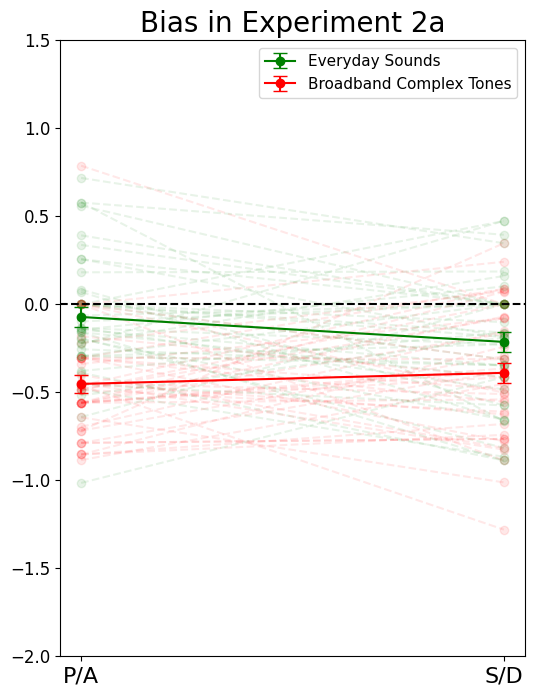

In [14]:
save_dir_mac =  "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/7.replicate-len4-Complextone-Everydaysounds/result/prolific-8-29-result"

df_PA = pd.read_csv(os.path.join(save_dir_mac,'P_A_bias_result.csv'))
df_SD = pd.read_csv(os.path.join(save_dir_mac,'S_D_bias_result.csv'))

# Add an 'Experiment' column to distinguish between P/A and S/D experiments
df_PA['Experiment'] = 'P_A'
df_SD['Experiment'] = 'S_D'

# Concatenate the two dataframes
df = pd.concat([df_PA, df_SD])

print('Total subjects:', int(len(df) / 2))
print('Columns:', df.columns)

# Split the concatenated dataframe back into P/A and S/D dataframes
df_PA = df[df['Experiment'] == 'P_A']
df_SD = df[df['Experiment'] == 'S_D']

# Prepare data for plotting
randomized_list = [[row_PA[df.columns[0]], row_PA[df.columns[1]], row_SD[df.columns[0]], row_SD[df.columns[1]]] 
                   for (_, row_PA), (_, row_SD) in zip(df_PA.iterrows(), df_SD.iterrows())]

print('Total subjects:', len(randomized_list))
print('Total number of categories for plotting:', len(randomized_list[0]))

# Convert the list to a numpy array
bias_array_random = np.array(randomized_list)

# Calculate average and standard error
bias_avg_random = np.mean(bias_array_random, axis=0)
bias_sem_random = np.std(bias_array_random, axis=0) / np.sqrt(len(randomized_list))

# Plotting
x = ['P/A', 'S/D']
plt.figure(figsize=(6, 8))

# Plot data for all subjects
for i, bias in enumerate(randomized_list):
    pitch = [bias[0], bias[2]]
    syllable = [bias[1], bias[3]]
    plt.plot(x, pitch, 'g--o', alpha=0.09)
    plt.plot(x, syllable, 'r--o', alpha=0.09)

# Plot average bias with error bars
plt.errorbar(x, bias_avg_random[0::2], yerr=bias_sem_random[0::2], fmt='go-', label='Everyday Sounds', capsize=5)
plt.errorbar(x, bias_avg_random[1::2], yerr=bias_sem_random[1::2], fmt='ro-', label='Broadband Complex Tones', capsize=5)

# Reference line at zero bias
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Bias in Experiment 2a', fontsize=20)
plt.xticks(x, fontsize=16)
plt.yticks(fontsize=12)
plt.ylim([-2, 1.5])  # Adjust the y-axis limits for bias range
plt.legend(loc='upper right', fontsize=11)

# Save the plot
save_path = os.path.join(save_dir_mac, "Complete_bias_result.png")
plt.savefig(save_path, dpi=300)
plt.show()


### Statistical test

In [15]:
# Read the data
ap_df = pd.read_csv(os.path.join(save_dir_mac, 'P_A_dprime_result.csv'))
sd_df = pd.read_csv(os.path.join(save_dir_mac, 'S_D_dprime_result.csv'))

# Assigning task names
ap_df['task'] = 'AP'
sd_df['task'] = 'SD'

# Melting the dataframes
ap_df = ap_df.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')
sd_df = sd_df.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')

# Combining the dataframes
combined_df = pd.concat([ap_df, sd_df]).reset_index(drop=True)
combined_df['subject'] = combined_df.groupby(['task', 'attend_condition']).cumcount() + 1

# Using 'pairwise_tests' instead of 'pairwise_ttests' to address the warning
# Conduct pairwise tests for the PA task with Bonferroni correction
pa_results = combined_df[combined_df['task'] == 'AP']
pa_pairwise_tests = pg.pairwise_tests(dv='dprime', within='attend_condition', subject='subject', 
                                      data=pa_results, padjust='bonf')

# Conduct pairwise tests for the SD task with Bonferroni correction
sd_results = combined_df[combined_df['task'] == 'SD']
sd_pairwise_tests = pg.pairwise_tests(dv='dprime', within='attend_condition', subject='subject', 
                                      data=sd_results, padjust='bonf')

# Print the results with Bonferroni correction
print("PA Task Pairwise Tests Results (with Bonferroni correction):")
print(pa_pairwise_tests)
print("\nSD Task Pairwise Tests Results (with Bonferroni correction):")
print(sd_pairwise_tests)


PA Task Pairwise Tests Results (with Bonferroni correction):
           Contrast                        A                          B  \
0  attend_condition  Randomized complex_tone  Randomized everyday_sound   

   Paired  Parametric        T   dof alternative         p-unc      BF10  \
0    True        True -8.74283  39.0   two-sided  9.952152e-11  1.02e+08   

     hedges  
0 -1.820204  

SD Task Pairwise Tests Results (with Bonferroni correction):
           Contrast                        A                          B  \
0  attend_condition  Randomized complex_tone  Randomized everyday_sound   

   Paired  Parametric          T   dof alternative         p-unc       BF10  \
0    True        True  12.320388  39.0   two-sided  5.074994e-15  1.323e+12   

     hedges  
0  2.149492  


In [16]:
ap_df = pd.read_csv(os.path.join(save_dir_mac,'P_A_dprime_result.csv'))
sd_df = pd.read_csv(os.path.join(save_dir_mac,'S_D_dprime_result.csv'))

ap_df['task'] = 'AP'
sd_df['task'] = 'SD'

ap_df = ap_df.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')
sd_df = sd_df.melt(id_vars=['task'], var_name='attend_condition', value_name='dprime')

combined_df = pd.concat([ap_df, sd_df]).reset_index(drop=True)
combined_df['subject'] = combined_df.groupby(['task', 'attend_condition']).cumcount() + 1
 #print(combined_df)

# 2 * 2 repeated ANOVA
aov = pg.rm_anova(dv='dprime', within=['task', 'attend_condition'], subject='subject', data=combined_df)

#Print the ANOVA table
print(aov)


                    Source         SS  ddof1  ddof2         MS           F  \
0                     task   0.004806      1     39   0.004806    0.014927   
1         attend_condition   0.923732      1     39   0.923732    2.252433   
2  task * attend_condition  76.551754      1     39  76.551754  257.510241   

          p-unc     p-GG-corr       ng2  eps  
0  9.033874e-01  9.033874e-01  0.000065  1.0  
1  1.414579e-01  1.414579e-01  0.012321  1.0  
2  8.987563e-19  8.987563e-19  0.508313  1.0  


- **Source**: Indicates the source of variation being analyzed. In your case, there are three sources: 'task' (AP vs. SD), 'attend_condition' (complex_tone vs. everyday_sound), and their interaction ('task * attend_condition').

- **SS (Sum of Squares)**: Represents the total variability explained by each source of variation.

- **ddof1 (Degrees of Freedom for Factor 1)**: Represents the degrees of freedom associated with each source of variation. For a single factor, the degrees of freedom are generally the number of levels of that factor minus 1. Here, both 'task' and 'attend_condition' have 1 degree of freedom, which makes sense given each has two levels.

- **ddof2 (Degrees of Freedom for Factor 2)**: Represents the degrees of freedom for the error term. In repeated measures ANOVA, this is often the product of the number of subjects and the degrees of freedom of the within-subject factor, minus the degrees of freedom of the within-subject factor. In your case, it's simply 39, which suggests that you have 40 subjects.

- **MS (Mean Square)**: The average variability explained by each source. It is calculated by dividing the Sum of Squares by its respective degrees of freedom.

- **F (F-value)**: The test statistic for each source of variation. It is calculated by dividing the Mean Square of the factor by the Mean Square of the error.

- **p-unc (Uncorrected p-value)**: The probability of obtaining an F-value as extreme as the one calculated, assuming the null hypothesis is true. A small p-value (< 0.05) typically indicates a statistically significant effect.

- **p-GG-corr (Greenhouse-Geisser Corrected p-value)**: A corrected p-value that accounts for the assumption of sphericity in a repeated measures ANOVA. In your case, it's identical to the uncorrected p-value, likely because you have only two levels for your within-subject factor, making the correction unnecessary.

- **ng2 (Partial Eta-squared)**: An effect size measure that indicates the proportion of total variance explained by the factor.

- **eps (Sphericity measure, Epsilon)**: Indicates if the sphericity assumption is met. A value of 1 suggests that the assumption is met.
